In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Logic function that has all logic written in it.

In [2]:
def Newton_Polynomial(m,x1,y1):                     #
  n1=len(x1)-1
  dd=np.zeros((n1,n1))
  h=x1[1]-x1[0]
  for i in range(n1):  
    dd[0][i]=(y1[i+1]-y1[i])/h
  for i in range(1,n1):
    for j in range(n1-i):
      dd[i][j]=(dd[i-1][j+1]-dd[i-1][j])/((i+1)*h)                                          #Preparing the divided differences table
  f=dd[:,0]                                                                                 #Getting the 1st value of each column as coefficients for polynomial
  sum=y1[0]
  for i in range(n1):
    ex=1
    for j in range(i+1):
      ex=ex*(m-x1[j])
    sum=sum+f[i]*ex                                                                         #Calculating the value of polynomial for a certain value inputted by user.
  return dd, sum


##Main function for taking input from the user and showing the relevant plots and outputs.

In [3]:
def main():                                                                                 #
  n=int(input("Enter the no of datapoints.  "))
  X = [float(item) for item in input("Enter the list items : ").split()]
  X=np.array(X)
  X_data=np.array([i/4 for i in range(16)])
  opt=int(input("Enter the function you want to use:\n  1.x**4  \n  2.e^(x/2) -1  \n  3.x *log (1+x) \n "))
  if opt==1:
    Y=X**4
    Y_act=X_data**4
  elif opt==2:
    Y=np.exp(X/2)-1
    Y_act=np.exp(X_data/2)-1
  elif opt==3:
    Y=X*np.log(1+X)
    Y_act=X_data*np.log(1+X_data)
  else:
    print("Invalid selection")
  cal=float(input("Enter the value you want to calculate. "))

  #Calculating using (n-1) polynomial
  DD,ans=Newton_Polynomial(cal,X,Y)
  print("The value for ",cal,"using the (n-1) Newton polynomial is: ",ans,"\n")
  _ ,Y_data=Newton_Polynomial(X_data,X,Y)
  print("The values by calculating from the polynomial of (n-1) using the values 0,0.25,0.5,......4 are : \n" ,Y_data,"\n")

  #Calculating using the half polynomial
  X_half=np.array([X[i] for i in range(0,len(X),2)])
  Y_half=np.array([Y[i] for i in range(0,len(Y),2)])
  DD2,ans2=Newton_Polynomial(cal,X_half,Y_half)
  print("The value for ",cal,"using the Newton polynomial of (n-1) /2 is: ",ans2,"\n")  
  _,Y_data_half=Newton_Polynomial(X_data,X_half,Y_half)
  print("The values by calculating from the polynomial (n-1)/2 using the values 0,0.25,0.5,......4 are : \n" ,Y_data_half,"\n")

  fig,ax=plt.subplots(3,1,figsize=(15,20))
  
 
  #Plotting the actual function and n-1 polynomial:
  ax[0].plot(X_data,Y_act, label="Actual function  ")
  ax[0].plot(X_data,Y_data,label="Newton polynomial of (n-1) degree")
  ax[0].scatter(X_data,Y_data)
  ax[0].set(title="(n-1) degree comparison with actual")
  ax[0].legend()

  #Plotting the actual function and (n-1)/2 polynomial:
  ax[1].plot(X_data,Y_act, label="Actual function  ")
  ax[1].plot(X_data,Y_data_half,label="Newton polynomial of (n-1)/2 degree")
  ax[1].scatter(X_data,Y_data_half)
  ax[1].set(title="(n-1)/2 degree comparison with actual")
  ax[1].legend()

  #Plotting the error
  error=Y_act-Y_data
  error_half=Y_act-Y_data_half
  ax[2].plot(X_data,error,label="Error due to Newton polynomial of (n-1) degree")
  ax[2].plot(X_data,error_half,label="Error due to Newton polynomial of (n-1)/2 degree")
  ax[2].set(title="Error due to both polynomial interpolations.")
  ax[2].legend()


  plt.show()



  

##For x^4 function

Enter the no of datapoints.  8
Enter the list items : 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6
Enter the function you want to use:
  1.x**4  
  2.e^(x/2) -1  
  3.x *log (1+x) 
 1
Enter the value you want to calculate. 2.5
The value for  2.5 using the (n-1) Newton polynomial is:  39.06250000000315 

The values by calculating from the polynomial of (n-1) using the values 0,0.25,0.5,......4 are : 
 [-1.10095266e-14  3.90625000e-03  6.25000000e-02  3.16406250e-01
  1.00000000e+00  2.44140625e+00  5.06250000e+00  9.37890625e+00
  1.60000000e+01  2.56289063e+01  3.90625000e+01  5.71914063e+01
  8.10000000e+01  1.11566406e+02  1.50062500e+02  1.97753906e+02] 

The value for  2.5 using the Newton polynomial of (n-1) /2 is:  31.851999999999983 

The values by calculating from the polynomial (n-1)/2 using the values 0,0.25,0.5,......4 are : 
 [-1.68000e-01  1.90000e-02  7.60000e-02  3.03000e-01  1.00000e+00
  2.46700e+00  5.00400e+00  8.91100e+00  1.44880e+01  2.20350e+01
  3.18520e+01  4.42390e+01  5.9

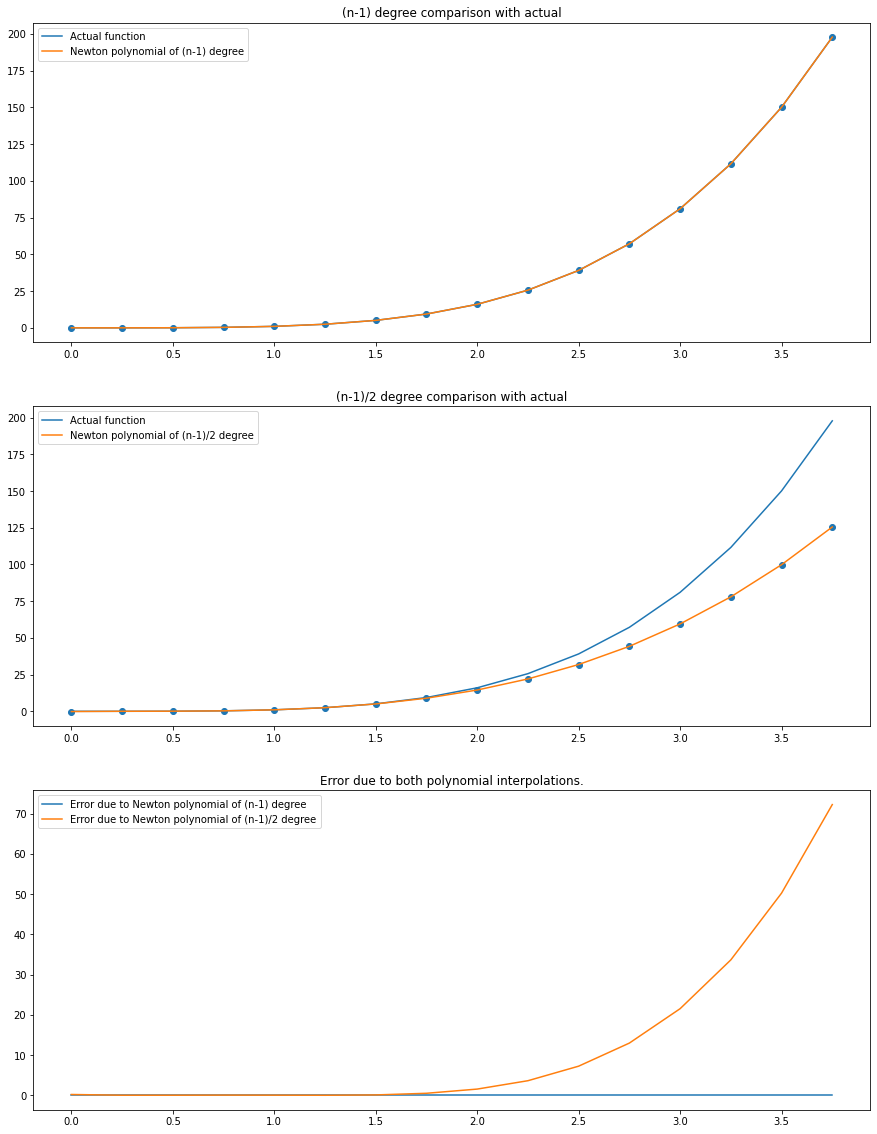

In [4]:
main()

####It is seen that x^4 function gives error when we use 4 points for Newton's polynomial but it shows perfect for 7 points.So a minimum of 5 points is necessary to plot the curve in form of Newton's polynomial.

##For e^(x/2) -1

In [5]:
 main()

KeyboardInterrupt: ignored

####It is seen that e^(x/2) -1 is perfectly converted into a Newton's polynomial which may be due to the fact that the points we used for making the Polynomial are very close to each other. i.e. 0 0.2 0.4,etc and even 3 points are sufficient to make up the polynomial. 

##For x *log (1+x)

In [ ]:
main()

####It is seen that x *log (1+x)  can't be expressed in form of a polynomial even using 7 points which are quite close to each other for polynomial build up.By using 4 points the error is quite evident.